<a href="https://colab.research.google.com/github/hyun3282/web1/blob/main/MLDM_Project_Python_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

라이브러리를 불러왔습니다.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import roc_curve, auc

Dataset을 불러왔습니다.

In [ ]:
dataset = pd.read_csv("C:/Users/jwm83/Desktop/data.csv")

Dataset 분석을 보여드리겠습니다.

In [ ]:
dataset.shape

(569, 33)

In [ ]:
dataset.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

'Unnamed: 32'라는 필요없는 열을 발견하였습니다. 처리했습니다. id도 필요없기 때문에 처리함

In [ ]:
dataset.info()
dataset.head()
dataset.drop('id', axis = 1, inplace = True)
dataset.drop('Unnamed: 32', axis = 1, inplace = True)
dataset.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [ ]:
dataset.shape
dataset.head() 
dataset.isna() # 결측치가 없는 지 확인하였음
# 이상치가 없는 지 확인
dict = {}
for i in list(dataset.columns):
    dict[i] = dataset[i].value_counts().shape[0]

pd.DataFrame(dict, index = ["고유 값의 개수"]).transpose()

,고유 값의 개수
diagnosis,2
radius_mean,456
texture_mean,479
perimeter_mean,522
area_mean,539
smoothness_mean,474
compactness_mean,537
concavity_mean,537
concave points_mean,542
symmetry_mean,432


# 여기서 diagnosis의 고유 값의 개수가 2개 이므로 Categorical variable임을 확인할 수 있다.
그러므로 Categorical variable을 활용 및 처리해야한다.

In [ ]:
# sklearn 패키지의 LabelEncoder를 활용하여 전처리한다.
from sklearn.preprocessing import LabelEncoder
labelencoder_y = LabelEncoder()
dataset.diagnosis = labelencoder_y.fit_transform(dataset.diagnosis)
dataset.head(20)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.26540,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678
5,1,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.17410,0.3985,0.12440
6,1,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368
7,1,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510
8,1,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720
9,1,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.20750


# 0이 양성 종양을 의미하고 1은 악성 종양을 의미한다.
- 양성종양은 비교적 서서히 성장하며, 신체 여러 분위에 확산·전이되지 않고 제거하여 치유시킬 수 있는 종양을 말합니다. 이와 달리 악성종양은 빠른 성장과 침윤성(파고들어 퍼져나감) 성장 및 체내 각 부위에 확산·전이되어 생명에 위험을 초래하는 종양을 말합니다. 출처 구글

이제부터 기초적인 데이터 시각화를 진행하겠다.

In [ ]:
df = pd.DataFrame (dataset, columns = ['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se','perimeter_se','area_se','smoothness_se','compactness_se','concavity_se','concave points_se','symmetry_se','fractal_dimension_se','radius_worst','texture_worst','perimeter_worst','area_worst','smoothness_worst','compactness_worst','concavity_worst','concave points_worst','symmetry_worst','fractal_dimension_worst'])

In [ ]:
df.corr() # 데이터별 상관계수를 구하였다.

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


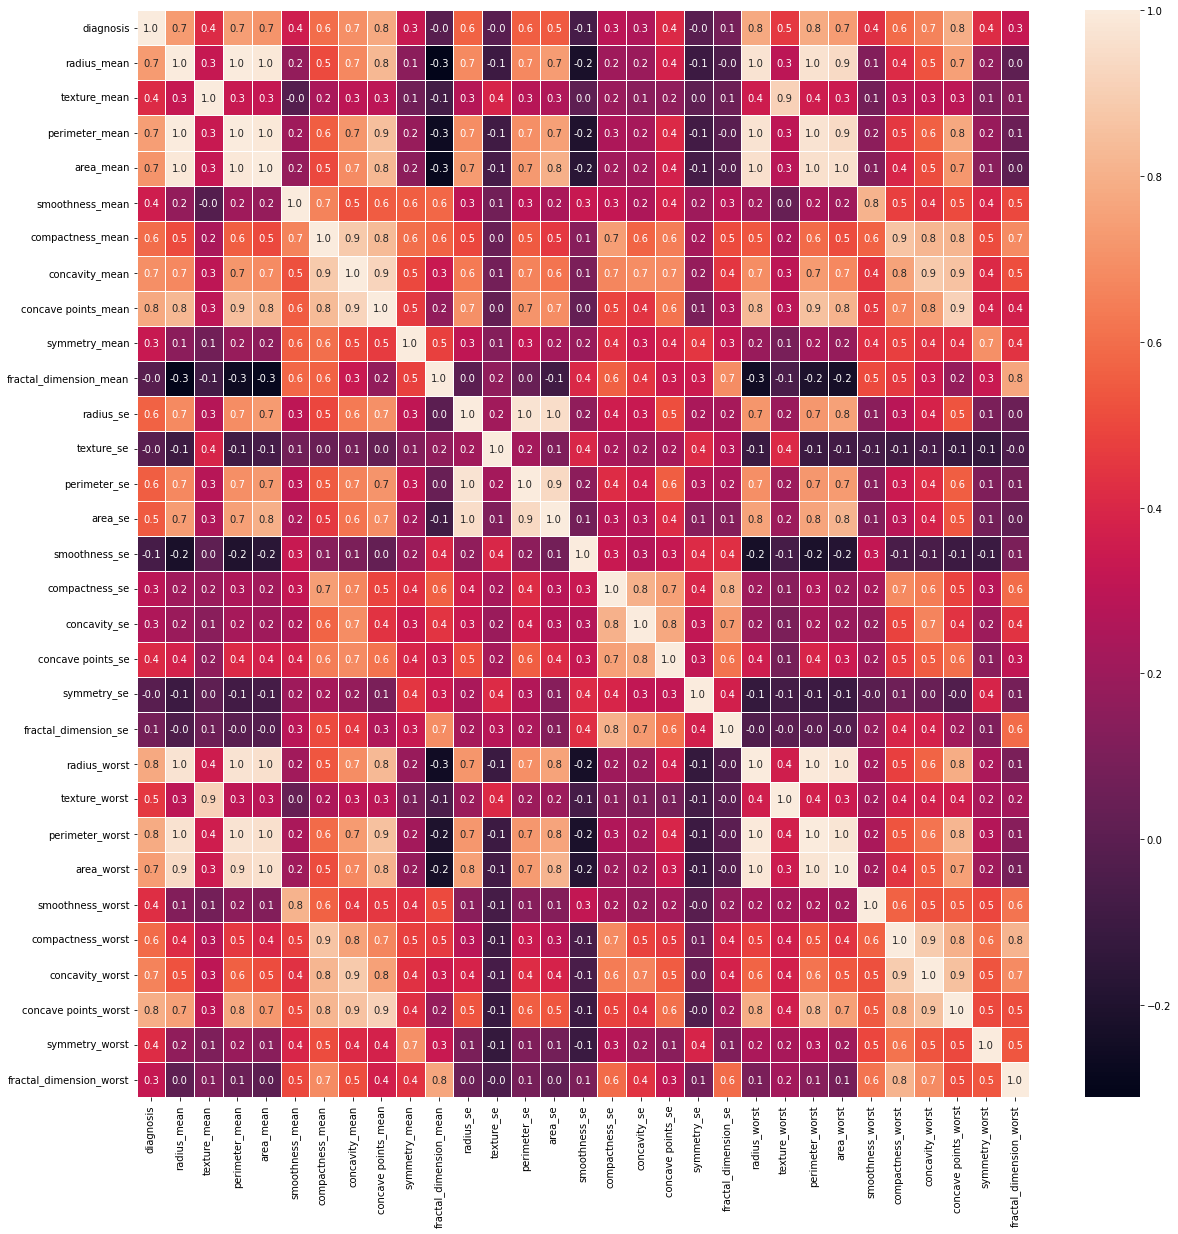

In [ ]:
corr_Matrix = df.corr()
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corr_Matrix, linewidths = 0.5, annot = True, fmt = '.1f', ax = ax)
plt.show()

- se(표준편차)는 종속 변수 diagnosis과 매우 약한 상관관계를 가지고 있기에 최종 작업 데이터셋에 포함시키지 않을 것이고
- mean과 worst는 diagnosis과 매우 강한 상관관계를 가지기에 둘 중에 하나만 사용할 수도 있다는 것을 의미한다.
- 그렇기에 저는 mean을 활용할 것이고 mean 들 중에 diagnosis와 상관관계가 0.5 이상인 것만 선택할 것이다.

In [ ]:
label = []
for i in range(30):
    if corr_Matrix.diagnosis[i+1] < 0.5 or i >= 10 :
        label.append(dataset.columns.values[i+1])
dataset.drop (labels = label, axis = 1, inplace = True)
dataset.head()

,diagnosis,radius_mean,perimeter_mean,area_mean,compactness_mean,concavity_mean,concave points_mean
0,1,17.99,122.80,1001.0,0.27760,0.3001,0.14710
1,1,20.57,132.90,1326.0,0.07864,0.0869,0.07017
2,1,19.69,130.00,1203.0,0.15990,0.1974,0.12790
3,1,11.42,77.58,386.1,0.28390,0.2414,0.10520
4,1,20.29,135.10,1297.0,0.13280,0.1980,0.10430


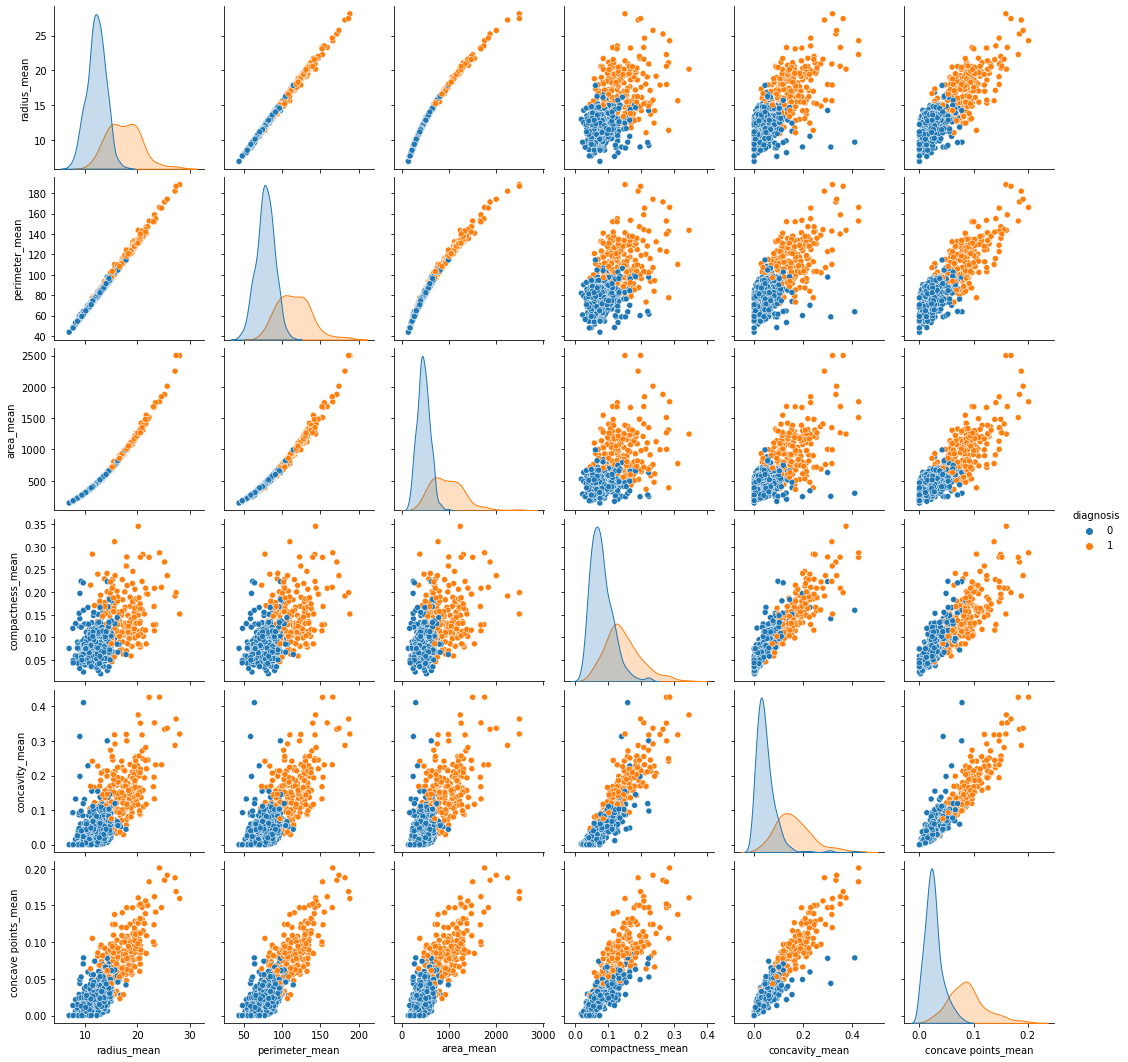

In [ ]:
# pairplot
sns.pairplot(dataset, hue = "diagnosis")
plt.show()

- 일관된 경향성이 보인다. feature의 값이 낮을 때, 주로 양성으로 진단이 되고 feature의 값이 높을 때 악성종양으로 진단된다.

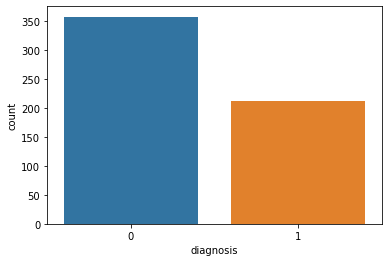

In [ ]:
sns.countplot(x = 'diagnosis', data = dataset)
plt.show()

- 양성으로 진단 된 것이 악성으로 진단된 것보다 많음을 알 수 있음.

# 데이터 전처리
- 우리의 알고리즘에 적용할 수 있게끔 데이터의 포맷을 변경하고 prediction 할 수 있게끔 만들었습니다.

In [ ]:
# 먼저 dataset을 독립변수와 종속변수로 나누었습니다.
# x가 features의 행렬이고 y가 반응 feature입니다.
x = dataset.iloc[:, 1:].values
y = dataset.iloc[:, 0].values
x.shape

(569, 6)

In [ ]:
# training dataset과 test dataset으로 나눕니다.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 1)

In [ ]:
y_train.shape
y_train

array([1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,

In [ ]:
x_test.shape

(114, 6)

In [ ]:
x_test

array([[1.469e+01, 9.822e+01, 6.561e+02, 1.836e-01, 1.450e-01, 6.300e-02],
       [1.317e+01, 8.598e+01, 5.346e+02, 1.231e-01, 1.226e-01, 7.340e-02],
       [1.295e+01, 8.314e+01, 5.137e+02, 7.943e-02, 6.155e-02, 3.370e-02],
       [1.831e+01, 1.186e+02, 1.041e+03, 8.468e-02, 8.169e-02, 5.814e-02],
       [1.513e+01, 9.671e+01, 7.195e+02, 4.605e-02, 4.686e-02, 2.739e-02],
       [1.616e+01, 1.062e+02, 8.098e+02, 1.284e-01, 1.043e-01, 5.613e-02],
       [1.919e+01, 1.263e+02, 1.157e+03, 1.185e-01, 1.193e-01, 9.667e-02],
       [1.808e+01, 1.174e+02, 1.024e+03, 8.642e-02, 1.103e-01, 5.778e-02],
       [1.048e+01, 6.672e+01, 3.377e+02, 5.971e-02, 4.831e-02, 3.070e-02],
       [1.453e+01, 9.386e+01, 6.442e+02, 9.242e-02, 6.895e-02, 6.495e-02],
       [1.104e+01, 7.092e+01, 3.732e+02, 7.804e-02, 3.046e-02, 2.480e-02],
       [1.419e+01, 9.287e+01, 6.107e+02, 1.306e-01, 1.115e-01, 6.462e-02],
       [1.624e+01, 1.088e+02, 8.051e+02, 1.802e-01, 1.948e-01, 9.052e-02],
       [1.236e+01, 7.901e

In [ ]:
# 평균은 0이고 분산은 1로 정규화 과정을 거칩니다.
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
x_train

array([[ 1.0449852 ,  1.01044815,  0.90312805,  0.4880825 ,  0.37978142,
         0.98174683],
       [ 1.68141074,  1.70338066,  1.74602236,  0.53430768,  1.35140244,
         1.3896859 ],
       [-1.44260855, -1.4504636 , -1.15482615, -1.42332889, -1.0722744 ,
        -1.17143992],
       ...,
       [ 0.82638686,  0.86625411,  0.7311257 ,  1.50118447,  0.99218954,
         0.75821857],
       [-0.05077356, -0.11146165, -0.16891866, -0.68584459, -0.93583586,
        -0.77803018],
       [-0.32748032, -0.39904866, -0.3886841 , -1.29813568, -0.79863648,
        -0.51716255]])

In [ ]:
x_test

array([[ 1.31852898e-01,  2.26192749e-01, -2.34206920e-02,
         1.51274076e+00,  6.90350912e-01,  3.40627142e-01],
       [-2.88741373e-01, -2.64067014e-01, -3.58866675e-01,
         3.47480894e-01,  4.10963095e-01,  6.04796901e-01],
       [-3.49616860e-01, -3.77820096e-01, -4.16568905e-01,
        -4.93624864e-01, -3.50493434e-01, -4.03620352e-01],
       [ 1.13353136e+00,  1.04249128e+00,  1.03923905e+00,
        -3.92507272e-01, -9.92938518e-02,  2.17178581e-01],
       [ 2.53603872e-01,  1.65711356e-01,  1.51618611e-01,
        -1.13654014e+00, -5.33716962e-01, -5.63900273e-01],
       [ 5.38611832e-01,  5.45822888e-01,  4.00925378e-01,
         4.49561511e-01,  1.82713226e-01,  1.66122695e-01],
       [ 1.37703331e+00,  1.35090632e+00,  1.35950024e+00,
         2.58882624e-01,  3.69803282e-01,  1.19587674e+00],
       [ 1.06988881e+00,  9.94426592e-01,  9.92304222e-01,
        -3.58994013e-01,  2.57549249e-01,  2.08034243e-01],
       [-1.03308255e+00, -1.03550517e+00, -9.024

In [ ]:
print(x_train[:3, :])

[[ 1.0449852   1.01044815  0.90312805  0.4880825   0.37978142  0.98174683]
 [ 1.68141074  1.70338066  1.74602236  0.53430768  1.35140244  1.3896859 ]
 [-1.44260855 -1.4504636  -1.15482615 -1.42332889 -1.0722744  -1.17143992]]


In [ ]:
print(x_test[:3, :])

[[ 0.1318529   0.22619275 -0.02342069  1.51274076  0.69035091  0.34062714]
 [-0.28874137 -0.26406701 -0.35886667  0.34748089  0.41096309  0.6047969 ]
 [-0.34961686 -0.3778201  -0.41656891 -0.49362486 -0.35049343 -0.40362035]]


# Model 사용

In [ ]:
# 로지스틱 회귀분석 모델
classifier_Log = LogisticRegression()
classifier_Log.fit(x_train, y_train)
y_pred_Log = classifier_Log.predict(x_test)
cm_log = confusion_matrix(y_test, y_pred_Log)
acc_Log = accuracy_score(y_test, y_pred_Log)
# K-NN 모델
classifier_knn = KNeighborsClassifier ()
classifier_knn.fit (x_train, y_train)
y_pred_knn = classifier_knn.predict (x_test)
cm_knn = confusion_matrix (y_test, y_pred_knn)
acc_knn = accuracy_score (y_test, y_pred_knn)
# Decision Tree모델
from sklearn.tree import DecisionTreeClassifier
classifier_dtc = DecisionTreeClassifier (criterion = 'entropy', random_state = 0)
classifier_dtc.fit (x_train, y_train)
y_pred_dtc = classifier_dtc.predict (x_test)
cm_dtc = confusion_matrix (y_test, y_pred_dtc)
acc_dtc = accuracy_score (y_test, y_pred_dtc)
# Random Forest
from sklearn.ensemble import RandomForestClassifier
classifier_rfc = RandomForestClassifier (n_estimators = 100, criterion = 'entropy', random_state = 1)
classifier_rfc.fit (x_train, y_train)
y_pred_rfc = classifier_rfc.predict (x_test)
cm_rfc = confusion_matrix (y_test, y_pred_rfc)
acc_rfc = accuracy_score (y_test, y_pred_rfc)

# random forest의 변수 중요도 체크
- Feature 가 6개만 나온 이유 : X의 열의 수가 6개로 제한되어 있기 때문이다.
- 이러한 현상이 발생하는 이유: x_train과 x_test 데이터의 열의 수가 다르기 때문이다.
- (향후 제시 사항)따라서, x_train과 x_test 데이터 셋에 동일한 변수들이 포함되어 있는 지 확인한다. 

In [ ]:
importances = classifier_rfc.feature_importances_

for i, importance in enumerate(importances):
    print(f"Feature {i}: {importance}")

Feature 0: 0.15178346782966304
Feature 1: 0.2030527624871924
Feature 2: 0.15987029194258542
Feature 3: 0.05186262825187706
Feature 4: 0.14621482388179893
Feature 5: 0.2872160256068833


# Accuracy 비교

In [ ]:
prediction_columns = ['모델의 이름', 'Accuracy score']
df_pred = {'모델의 이름' : ['로지스틱 회귀분석', 'k-nn', 'decision tree', 'random forest'], 'Accuracy Score' : [acc_Log, acc_knn, acc_dtc, acc_rfc ]}

In [ ]:
df_predictions = pd.DataFrame(df_pred)
df_predictions

,모델의 이름,Accuracy Score
0,로지스틱 회귀분석,0.929825
1,k-nn,0.877193
2,decision tree,0.894737
3,random forest,0.921053


# 여기까지의 결론 로지스틱 회귀분석이 가장 accuracy가 높다

# hyperparameter tuning
- 가능한 높은 accuracy를 위해서 hyperparameter tuning을 통해서 optimum parameter values를 찾았습니다.

In [ ]:
 # 로지스틱 회귀분석
parameters = [{'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}]
grid_search = GridSearchCV(estimator = classifier_Log,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search.fit(x_train, y_train)
best_accuracy_log = grid_search.best_score_
best_parameters = grid_search.best_params_
print(best_accuracy_log)
print(best_parameters)
# 하이퍼파리미터 튜닝할 때 쓰는 매개변수 중에 C는 강도 제어 변수이고, penalty는 규제 유형 지정 변수이고, solver는선형계획 모델 최적화 방법 선택한 것입니다.


0.9210628019323671
{'C': 0.001, 'penalty': 'l2', 'solver': 'liblinear'}


C:\Users\jwm83\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
210 fits failed out of a total of 700.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
70 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\jwm83\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jwm83\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\jwm83\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
Va

In [ ]:
# K-nn
parameters = [{'n_neighbors': [3,5,7,10,13,15], 'weights': ['uniform', 'distance'],
                'p': [1,2]}]
grid_search = GridSearchCV(estimator = classifier_knn,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search.fit(x_train, y_train)
best_accuracy_knn = grid_search.best_score_
best_parameters = grid_search.best_params_
print(best_accuracy_knn)
print(best_parameters)

0.9210144927536232
{'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}


In [ ]:
# Decision tree
parameters = [{'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150], 
                'max_leaf_nodes': [2,4,6,10,15,30,40,50,100], 'min_samples_split': [2, 3, 4]}]
grid_search = GridSearchCV(estimator = classifier_dtc,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search.fit(x_train, y_train)
best_accuracy_dtc = grid_search.best_score_
best_parameters = grid_search.best_params_
print(best_accuracy_dtc)
print(best_parameters)

0.9122705314009663
{'criterion': 'gini', 'max_depth': 9, 'max_leaf_nodes': 30, 'min_samples_split': 3}


In [ ]:
# Random Forest
parameters = [{'n_estimators': [100,200,300],
               'max_features': ['auto', 'sqrt'],
               'max_depth': [10,25,50,'none'],
               'min_samples_leaf': [1, 2], 
               'min_samples_split': [2, 5]}]
grid_search = GridSearchCV(estimator = classifier_rfc,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search.fit(x_train, y_train)
best_accuracy_rfc = grid_search.best_score_
best_parameters = grid_search.best_params_
print(best_accuracy_rfc)
print(best_parameters)

C:\Users\jwm83\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
240 fits failed out of a total of 960.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
240 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\jwm83\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jwm83\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\Users\jwm83\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\jwm83\anaconda3\lib\site-packages

0.9034299516908213
{'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


In [ ]:
prediction_columns = ["모델 이름", "ACCURACY SCORE", "BEST ACCURACY (하이퍼파리미터 이후)"]
df_pred = {"모델 이름" : ["LOGISTIC REGRESSION", "K-NN", "DECISION TREE", "RANDOM FOREST"],
           "ACCURACY SCORE " : [acc_Log, acc_knn, acc_dtc, acc_rfc],
           "BEST ACCURACY (하이퍼파리미터 이후)" : [best_accuracy_log, best_accuracy_knn, best_accuracy_dtc, best_accuracy_rfc]}
df_predictions = pd.DataFrame (df_pred)
df_predictions

,모델 이름,ACCURACY SCORE,BEST ACCURACY (하이퍼파리미터 이후)
0,LOGISTIC REGRESSION,0.929825,0.921063
1,K-NN,0.877193,0.921014
2,DECISION TREE,0.894737,0.912271
3,RANDOM FOREST,0.921053,0.903430


# 여기까지의 결론 하이퍼파리미터 이후에도 로지스틱 회귀가 정확도가 가장 높다

# 여기부터 voting을 진행

Voting 분류기의 정확도: 0.9211


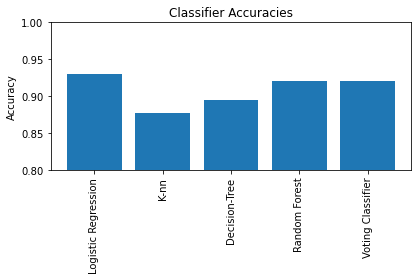

In [ ]:
classifier1 = classifier_Log
classifier2 = classifier_knn
classifier3 = classifier_dtc
classifier4 = classifier_rfc
# 개별 모델을 소프트 보팅 기반의 앙상블 모델로 구현한 분류기
voting_classifier = VotingClassifier(
    estimators=[('clf1', classifier1), ('clf2', classifier2), ('clf3', classifier3),('clf4', classifier4)],
    voting='soft'
)

voting_classifier.fit(x_train, y_train)
predictions = voting_classifier.predict(x_test)
print('Voting 분류기의 정확도: {0:.4f}'.format(accuracy_score(y_test, y_pred)))


# 개별 정확도
classifiers = [classifier1, classifier2, classifier3, classifier4]
accuracies = []
for clf in classifiers:
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# voting 분류기의 정확도
voting_accuracy = accuracy_score(y_test, voting_classifier.predict(x_test))
accuracies.append(voting_accuracy)

# 시각화
labels = ['Logistic Regression', 'K-nn', 'Decision-Tree' , 'Random Forest', 'Voting Classifier']
x = np.arange(len(labels))
plt.bar(x, accuracies)
plt.xticks(x, labels, rotation= 'vertical')
plt.ylim([0.8, 1.0])
plt.ylabel('Accuracy')
plt.title('Classifier Accuracies')
plt.tight_layout()
plt.show()

# Soft voting을 활용하여 다수의 모델을 결합하여 예측을 수행하였다. 
- 이를 미루어 보았을 때 voting classifier와 비교를 하였을 때 조차도 로지스틱 회귀분석이 accuracy가 더 높음을 확인할 수 있다. 즉, voting의 성능이 기반 분류기들의 성능보다 높게 나왔지만, 반드시 항상 그렇다고 할 수 없다는 것을 보인다.
- 소프트 보팅(Soft Voting)
    1. 각 분류기별 레이블 값 결정 확률을 평균 낸 확률이 가장 높은 레이블 값을 최종 보팅 결과값으로 선정
    2. 일반적으로 이 방식이 성능이 더 좋아 자주 사용한다.

# ROC 곡선 구현

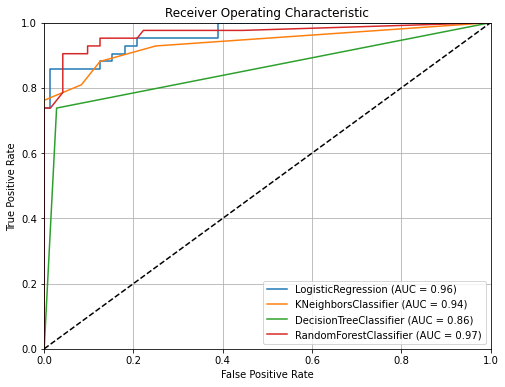

In [ ]:
classifiers = [
    LogisticRegression(),
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier()
]

plt.figure(figsize=(8, 6))

for classifier in classifiers:
    classifier.fit(x_train, y_train)
    y_scores = classifier.predict_proba(x_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_scores)
    roc_auc = auc(fpr, tpr)
    label = classifier.__class__.__name__
    plt.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()